In [524]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')
sys.path.append(home + '/projects/turbubox/tools')

import numpy as np
import pandas as pd
import glob
import cubicle
import turbubox.ulz as ulz

import scipy.interpolate

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline

dpi = 100
fac = 0.5
geo = (fac*1920,fac*1080)

In [602]:
#fp = '/mnt/sshfs/supermuc2/gss/scratch/pr62su/ri97lab8/StirTurb_CGM_dense5_512/StirTurb_hdf5_plt_cnt_0013'
fp = '/mnt/data/couchdg/test/data/chkpt_0487.h5'
#fp = '/home/jmark/tmp/crossroads/chkpt_0184.h5'
fh = cubicle.File(fp)
extent = fh.domain.T.ravel()
extent = np.roll(extent,2)

dens, velx, vely, velz, pres = fh.get_prims(Nvisu=25)

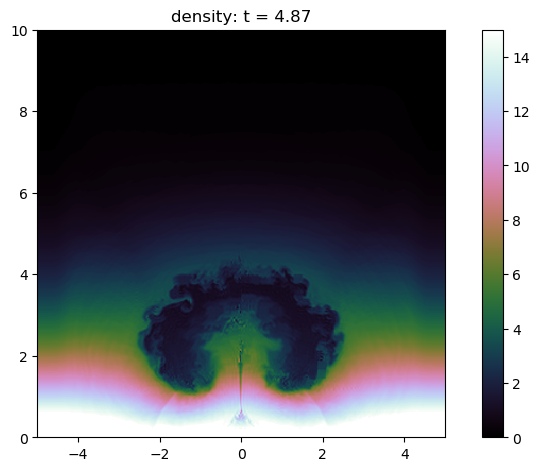

In [603]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = dens.T

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    vmin = 0,
    vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

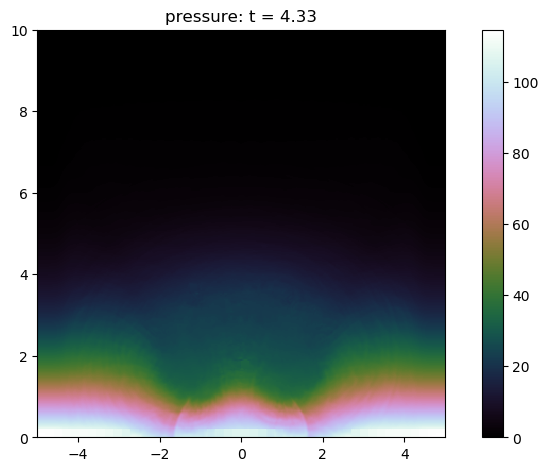

In [600]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = pres.T

plt.title('pressure: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 6,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

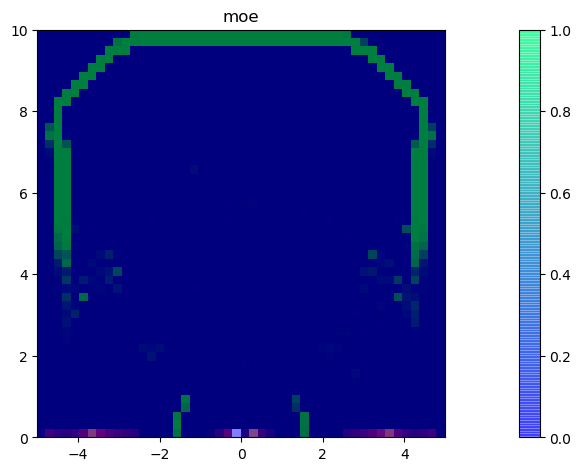

In [601]:
fig = plt.figure(1,figsize=(2*geo[0]/dpi, geo[1]/dpi), dpi=dpi)


data = fh.stitch(1,dname='limiter')
data = data.T

plt.title('moe')
plt.imshow(
    data,
    extent = extent,
    vmin = 0.0,
    #alpha=0.5,
    #vmax = 1.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)

data = fh.stitch(7,dname='limiter')
data = data.T
#data = np.log10(data)

plt.title('moe')
plt.imshow(
    data,
    extent = extent,
    vmin = 0.0,
    alpha=0.5,
    #vmax = 1.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('winter'),
)


plt.colorbar()

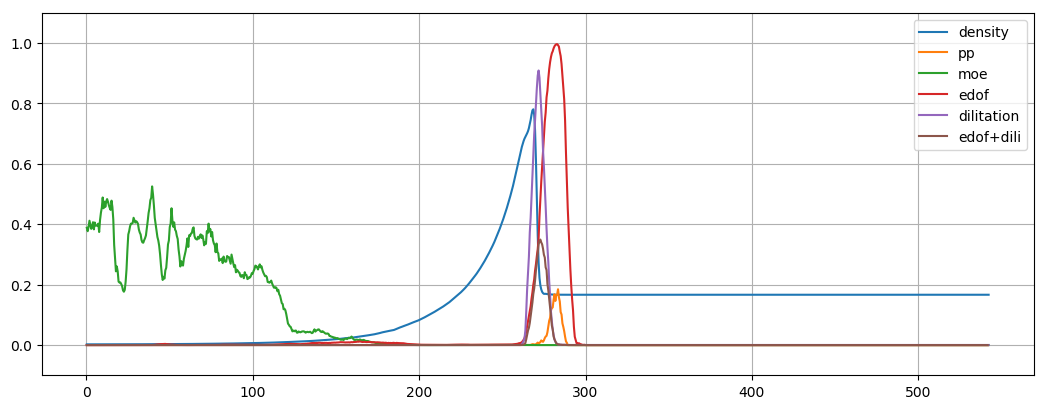

In [48]:
dpi = 100
fig = plt.figure(1,figsize=(2*640/dpi, 480/dpi), dpi=dpi)
plt.grid()

kwargs = {'nshells': 2*1024, 'npoints': 2*1024}

data = dens / 6.0
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='density')

data = 1000*fh.stitch(0,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='pp')

data = 10*fh.stitch(1,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='moe')

edof = fh.stitch(5,dname='limiter')
dili = fh.stitch(7,dname='limiter')

data = edof
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='edof')

data = dili
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='dilitation')

data = edof*dili
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='edof+dili')

#plt.xlim(0.0,0.25)
plt.ylim(-0.1,1.1)
plt.legend()

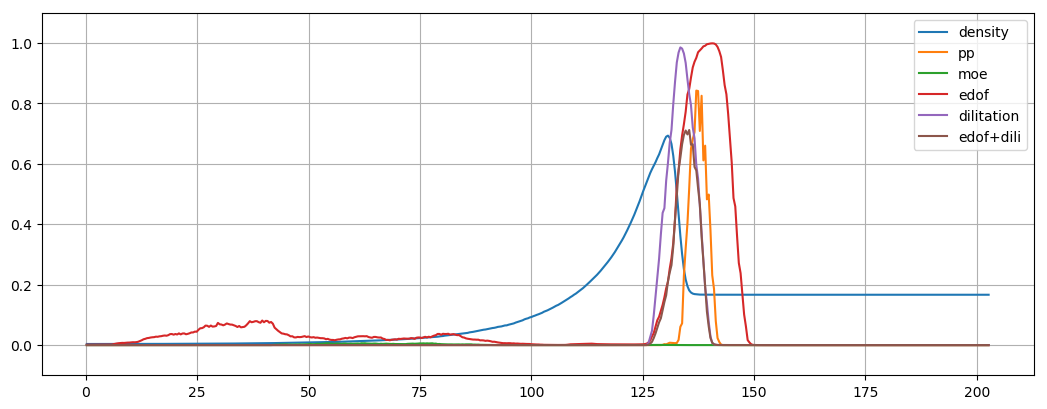

In [426]:
dpi = 100
fig = plt.figure(1,figsize=(2*640/dpi, 480/dpi), dpi=dpi)
plt.grid()

kwargs = {'nshells': 1024, 'npoints': 1024}

data = dens / 6.0
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='density')

data = 1000*fh.stitch(0,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='pp')

data = fh.stitch(1,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='moe')

edof = fh.stitch(5,dname='limiter')
dili = fh.stitch(7,dname='limiter')

data = edof
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='edof')

data = dili
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='dilitation')

data = edof*dili
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='edof+dili')

plt.ylim(-0.1,1.1)
plt.legend()

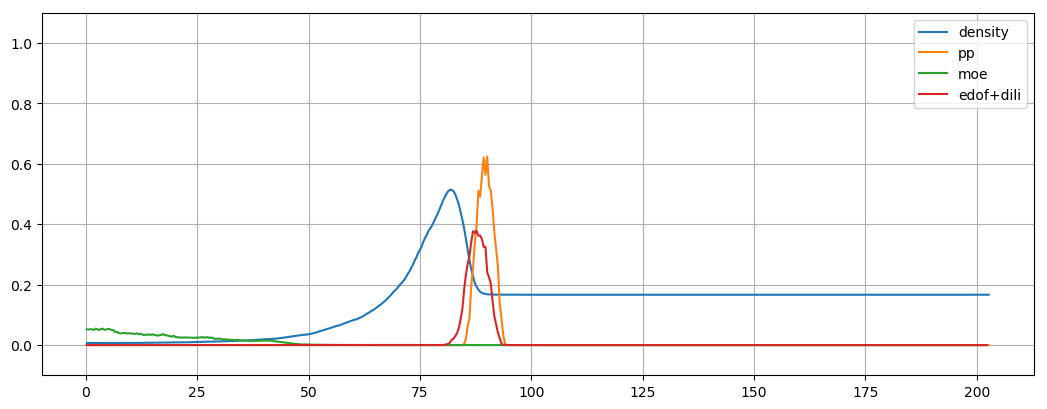

In [404]:
dpi = 100
fig = plt.figure(1,figsize=(2*640/dpi, 480/dpi), dpi=dpi)
plt.grid()

kwargs = {'nshells': 1024, 'npoints': 1024}

data = dens / 6.0
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='density')

data = 1000*fh.stitch(0,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='pp')

data = fh.stitch(1,dname='limiter')
xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='moe')

edof = fh.stitch(5,dname='limiter')
dili = fh.stitch(7,dname='limiter')

data = edof * dili

xs,ys = shellavg2d(data,**kwargs)
plt.plot(xs,ys,label='edof+dili')

plt.ylim(-0.1,1.1)
plt.legend()